![](Pictures/Start_notebook.png)

<b>  </b>  
<b>  </b>  
Ноутбук от 23.12.22 
<b>  </b>  
<b>  </b>  
<b>  </b>  
<b>  </b>  
<b>  </b>  
<b>  </b>  
<b>  </b>   
_финальная работа "Data Science"_  
_специальность: Data Analist_  

Выполнено:  
Аргентов Сергей, г.Липецк  
https://argentov.pro
<b>  </b>  
<b>  </b>  

<h1>СОДЕРЖАНИЕ<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#1.-Загрузка-библиотек-и-написание-вспомогательных-функций" data-toc-modified-id="1.-Загрузка-библиотек-и-написание-вспомогательных-функций-1">1. Загрузка библиотек и написание вспомогательных функций</a></span></li><li><span><a href="#2.-Знакомство-с-данными-(Data-Uderstanding)" data-toc-modified-id="2.-Знакомство-с-данными-(Data-Uderstanding)-2">2. Знакомство с данными (Data Uderstanding)</a></span><ul class="toc-item"><li><span><a href="#2.1.-Описание-элементов-решаемой-задачи" data-toc-modified-id="2.1.-Описание-элементов-решаемой-задачи-2.1">2.1. Описание элементов решаемой задачи</a></span><ul class="toc-item"><li><span><a href="#2.1.1.-Описание-атрибутов-исходных-Датасетов" data-toc-modified-id="2.1.1.-Описание-атрибутов-исходных-Датасетов-2.1.1">2.1.1. Описание атрибутов исходных Датасетов</a></span></li><li><span><a href="#2.1.2.-Описание-заданных-бизнес-связей-между-атрибутами-Датасетов" data-toc-modified-id="2.1.2.-Описание-заданных-бизнес-связей-между-атрибутами-Датасетов-2.1.2">2.1.2. Описание заданных бизнес-связей между атрибутами Датасетов</a></span></li><li><span><a href="#2.1.3.-Задачи-исследования" data-toc-modified-id="2.1.3.-Задачи-исследования-2.1.3">2.1.3. Задачи исследования</a></span></li></ul></li><li><span><a href="#2.1.-Загрузка-и-описание-данных-о-визитах-и-событиях" data-toc-modified-id="2.1.-Загрузка-и-описание-данных-о-визитах-и-событиях-2.2">2.1. Загрузка и описание данных о визитах и событиях</a></span></li><li><span><a href="#2.2.-Проверка-полей-Датасетов-на-соответствие-типов-в-каждом-поле" data-toc-modified-id="2.2.-Проверка-полей-Датасетов-на-соответствие-типов-в-каждом-поле-2.3">2.2. Проверка полей Датасетов на соответствие типов в каждом поле</a></span></li><li><span><a href="#2.3.-Описание-атрибутов-Датасетов,-формирование-единого-Датасета" data-toc-modified-id="2.3.-Описание-атрибутов-Датасетов,-формирование-единого-Датасета-2.4">2.3. Описание атрибутов Датасетов, формирование единого Датасета</a></span></li></ul></li><li><span><a href="#3.-Отчистка-и-коррекция-данных-(Data-Preparation)" data-toc-modified-id="3.-Отчистка-и-коррекция-данных-(Data-Preparation)-3">3. Отчистка и коррекция данных (Data-Preparation)</a></span><ul class="toc-item"><li><span><a href="#3.1.-Проверка-и-коррекция-ошибочного-написания-уникальных-значений-в-Датасете" data-toc-modified-id="3.1.-Проверка-и-коррекция-ошибочного-написания-уникальных-значений-в-Датасете-3.1">3.1. Проверка и коррекция ошибочного написания уникальных значений в Датасете</a></span></li><li><span><a href="#3.2.-Проверка-и-коррекция-пустых-значений-в-Датасете" data-toc-modified-id="3.2.-Проверка-и-коррекция-пустых-значений-в-Датасете-3.2">3.2. Проверка и коррекция пустых значений в Датасете</a></span></li></ul></li></ul></div>

# 1. Загрузка библиотек и написание вспомогательных функций

In [1]:
## Загрузка библиотек
import os
import pandas as pd
import datetime as dt
import missingno as msno

In [2]:
## Подготовка вспомогательных функций, используемых в исследовании

### Функция загрузки датасета и определения характеристик источника данных
def file_info(df, file_path):
    """
    Функция описывает файл источник для загруженного датасета
    
        Параметры:
            df (DataFrame): загруженный датасет
            file_path (sgr): отрносительнрый путь к файлу с датасетом
        Выходные параметры (None)
    
    """
    print(f'\nИсточником данных является файл: {file_path[8:]}'
          f'\nРазмер файла {os.stat(file_path).st_size} байт'
          f'\nВ файле содержится 1 таблица:'
          f'\n  - количество строк: {df.shape[0]}'
          f'\n  - количество столбцов: {df.shape[1]}')


### Функция проверки всех колонок Датасета на единство типа данных в колонке
def checking_type_error(df):
    """
    Функция проверяет каждое поле датасета на несовпадение типов данных и выводит поля с указанием количества записей разных типов
    
        Параметры:
            df (DataFrame): проверяемый датасет
        Выходные параметры:
            columns_noncorrect_types (list): список полей датасета, в каждом из которых найдены разные типы данных
    
    """
    flagCorrect = True
    columns_noncorrect_types = []
    for elem in df.columns:
        df_type = df[elem].apply(lambda x: type(x)).value_counts().to_frame()
        if len(df_type) > 1:
            columns_noncorrect_types.append(elem)
            if flagCorrect:
                print('Обнаружены данные разного типа в поле одного атрибута')
                print(' ------------------------------------------------------------ ')
                print('|  НАИМЕНОВАНИЕ ПОЛЯ  |  ТИП ДАННЫХ  |   КОЛИЧЕСТВО ЗАПИСЕЙ  |')
                print(' ------------------------------------------------------------ ')
            flagCorrect = False
            
            for i in range(len(df_type)):
                print('   ', df_type.columns[0], ' ' * (21 - len(df_type.columns[0])),
                      str(df_type.index[i])[7:-1], ' ' * (21 - len(str(df_type.index[i])[7:-1])),
                      str(df_type[df_type.columns[0]].values[i]))
            print(' ------------------------------------------------------------ ')
    if flagCorrect:
        print('Полей с разными типами данных в одном атрибуте не обнаружено!')
    
    return columns_noncorrect_types


### Функция изменения типа данных с 'float' на 'str'
def correct_type(df, noncorrect_columns):
    """
    Функция изменяет типы данных на 'str' в заданных полях датасета
    
        Параметры:
            df (DataFrame): датасет, в котором корректируются типы данных полей
            noncorrect_columns (list): список полей датасета, в которых функция корректирует тип данных
        Выходные параметры (None)
        
    """
    for elem in noncorrect_columns:
        df[elem] = df[elem].apply(lambda x: str(x))
    print(f'Коррекция датасета завершена в {len(noncorrect_columns)} колонках')
    print('... запущена перепроверка отсутствия разных типов данных ... ')
    checking_type_error(df)


## Функция проверки наличия незаполненных значений в колоноках датасета
def data_set_audit(df):
    """
    Функция проверяет пропуски в Датасете и выводит для каждого поля долю пропусков в % от общего количесвтва записей
    
        Параметры:
            df (DataFrame): датасет, в котором проверяются пропуски
        Выходные параметры (None)
        
    """
    print('Размер анализируемого Датасета:', df.shape)
    nan_columns = [(elem, df[elem].isna().sum(), type(df.loc[0, elem]))
                   for elem in df.columns
                   if df[elem].isnull().describe()[1] > 1 or
                   df[elem].isnull().describe()[1] == 1 and
                   df[elem].isnull()[0] == True]
    if len(nan_columns) > 0:
        print('ПРОПУСКИ  В  КОЛОНКАХ  ДАТАСЕТА')
        print('========================================================================')
        print('  Поле                        Пропуски             Тип данных в колонке ')
        print('                           (кол-во,      %)                             ')
        print('------------------------------------------------------------------------')
        for elem in nan_columns:
            print(' ', elem[0],
                  ' ' * (24 - len(elem[0])), elem[1],
                  ' ' * (9 - len(str(elem[1]))), round((elem[1] / len(df) * 100), 2),
                  ' ' * 12, str(elem[2])[7:-1])
        print('========================================================================')
    else:
        print('Пропущенных данных в Датасете не обнаружено!')


## Функция вывода на экран уникальных значений выранных атрибутов Датасета
def print_unique(df, attributes):
    """
    Функция выводит на экран уникальный набор значений в зананном наборе колонок датасета
    
        Параметры:
            df (DataFrame): датасет, который обрабатывает функция
            attributes (list): список колонок, которые которые обрабатывает функция в датасете
        Выходные параметры (None)
        
    """
    for category in attributes:
        print ('-' * 12)
        print(f'В атрибуте: {category} - {df[category].nunique()} значений')
        ls = [elem for elem in df[category].unique() if isinstance(elem, str)]
        ls.sort()
        print(ls)


## Функция отчистки столбцов и строк от нулевых значений
def clean_columns_rows(df, col_col_df, col_row_df,\
                       col_cell_val_top, col_cell_val_top_corr):
    """
    Функция удаляет заданные столбы. Затем функция удаляет строки, в которых есть пропущеные данные 
    
        Параметры:
            df (DataFrame): датасет, в котором удаляются столбы, затем проверяются пропуски и удаляют соответвующие строки
            col_col_df (list): список колонок, которые необходимо удалить.
            col_row_df (list): списко колонок, при наличии пропусках в которых - необходимо удалить строки.
            col_cell_val_top (list): список колонок, в которых необходимо замеить пропуски простым выбором наиболее часто встречающихся значений.
            col_cell_val_top_corr (list(typle)): списко кортежей, в которых указываются родительские и дочернии колонки для подбора наиболее часто встречающихся значений в дочерней колонке с учтом соответствующего значения в родительской колонке.
        Выходные параметры:
            df_clear (DataFrame): датасет, отчищенный от пропусков
        
    """
    
    print('Размер анализируемого Датасета:', df.shape, '\n')
    print('... удаляем колонки, в которых более 40% пропущенных данных ...')
    df_drop_nacolumns = df.drop(columns=col_col_df, axis=1) # Удаление колонки 'hit_time'
    print('После удаления заданных колонок - размер датасета:', df_drop_nacolumns.shape, '\n')
    
    print('... удаляем строки, для которых в колонках менее 1% пропущенных данных ...')
    df_clear = df_drop_nacolumns.dropna(subset=col_row_df, axis=0, how='any') # Удаление строк, в которых выявлены пропущенные данные
    print('После удаления строк с нулевыми значениями - размер датасета:', df_clear.shape, '\n')
    print(f'Удаление колонок и 1 этап удаления строк с нулевыми данными - завершены\n')
    print('... запущена перепроверка отсутствия нулевых данных ... ')
    data_set_audit(df_clear)
    
    print('... в независимых колонках меняем пропущенные данные на наиболее часто встречающиеся ... ')
    for col in col_cell_val_top:
        nan_indexes = df_clear[df_clear[col].isnull()].index
        df_clear.loc[nan_indexes, col] = df_clear[col].describe().loc['top']
    
    
        
    print(f'Первый этап замены пропусков - завершён\n')
    
    print('... запущена перепроверка отсутствия нулевых данных ... ')
    data_set_audit(df_clear)
    
    print('\n')
    for column_elem in col_cell_val_top_corr:
        parent_column, child_column = column_elem[0], column_elem[1]

        # 1. Определяем уникальные значения родительской колонки,
        #    имеющие пустые значения в дочерней колонке
        columns_non_correct = list(df_clear[parent_column].loc[df_clear[child_column].isnull()].unique())

        # 2. заполняем пустоты названиями, встречающимеся чаще всего среди значений
        #    дочерней колонки для соответвующего значения родительской колонки Датасета

        for col_cor in columns_non_correct:

            # Массив индексов пустых значений в дочерней колонке Датасета,
            # соответсвующих значению родительской колонки Датасета 
            index_nan_values = df_clear[child_column].\
                            loc[df_clear[child_column].isnull()].\
                            loc[df_clear[parent_column] == col_cor].index

            # Самое часто встречающееся значение в дочерней колонке,
            # соответсвущее значению родительской колонки Датасета
            top_value = str(df_clear[child_column].\
                            loc[df_clear[child_column].notnull()].\
                            loc[df_clear[parent_column] == col_cor].\
                            describe().top) 

            if top_value not in [None, 'nan', 'null', 'Nan', 'NaN']:
                df_clear.loc[index_nan_values, child_column] = top_value

        print('... в зависимых колонках меняем пропуски на самые частые значения ... ')
        print(f'Заменена нулевых данных, для которых выявлены наиболее часто встречающиеся значения - завершена\n')
        print('... запущена перепроверка отсутствия нулевых данных ... ')
        data_set_audit(df_clear)

        print('... удаляем строки, для которых в колонках остались пропущенные данные ...')
        df_clear = df_clear.dropna(subset=[child_column], axis=0, how='any') # Удаление строк, в которых выявлены пропущенные данные
        print('После удаления строк с нулевыми значениями - размер датасета:', df_clear.shape, '\n')
        print(f'Удаление строк с нулевыми данными - завершено\n')
        print('... запущена перепроверка отсутствия нулевых данных ... ')
        data_set_audit(df_clear)
    
    return df_clear

# 2. Знакомство с данными (Data Uderstanding)

## 2.1. Описание элементов решаемой задачи

### 2.1.1. Описание атрибутов исходных Датасетов

Атрибуты Датасета визитов {поле, (пример данных), описание}:
>`session_id` () — ID визита  
>`client_id` () — ID посетителя  
>`visit_date` () — дата визита  
>`visit_time` () — время визита  
>`visit_number` () — порядковый номер визита клиента  
>`utm_source` () — канал привлечения  
>`utm_medium` () — тип привлечения  
>`utm_campaign` () — рекламная кампания  
>`utm_keyword` () — ключевое слово  
>`device_category` () — тип устройства  
>`device_os` () — ОС устройства  
>`device_brand` () — марка устройства  
>`device_model` () — модель устройства  
>`device_screen_resolution` () — разрешение экрана  
>`device_browser` () — браузер  
>`geo_country` () — страна  
>`geo_city` () — город

Атрибуты Датасета событий {поле, (пример данных), описание}:
>`session_id` — () ID визита  
>`hit_date` — () дата события  
>`hit_time` — () время события  
>`hit_number` — () порядковый номер события в рамках сессии  
>`hit_type` — () тип события  
>`hit_referer` — () источник события  
>`hit_page_path` — () страница события  
>`event_category` — () тип действия  
>`event_action` — () действие  
>`event_label` — () тег действия  
>`event_value` — () значение результата действия

### 2.1.2. Описание заданных бизнес-связей между атрибутами Датасетов

**Целевое действие — события типа «Оставить заявку» и «Заказать звонок»**  
`ga_hits.event_action` принимает одно из следующих значений  
['sub_car_claim_click', 'sub_car_claim_submit_click', 'sub_open_dialog_click', 'sub_custom_question_submit_click', 'sub_call_number_click', 'sub_callback_submit_click', 'sub_submit_success', 'sub_car_request_submit_click']

**CR (Conversion Rate) — показатель конверсии** из визита (уникальный `session_id`) в любое целевое действие в рамках одного визита. В случае наличия более одного целевого действия — считать все действия как одно.

**Органический трафик — все визиты, в которых:**  
`ga_sessions.utm_medium` принимает одно из следующих значений ['organic', 'referral', '(none)']  
**Платный трафик — весь неорганический трафик**

**Информация про марку и модель автомобиля** содержится в `ga_hits.hit_page_path`

**Реклама в социальных сетях — все визиты в которых:**  
`с ga_sessions.utm_source` принимает одно из следующих значений:  
['QxAxdyPLuQMEcrdZWdWb', 'MvfHsxITijuriZxsqZqt', 'ISrKoXQCxqqYvAZICvjs', 'IZEXUFLARCUMynmHNBGo', 'PlbkrSYoHuZBWfYjYnfw', 'gVRrcxiDQubJiljoTbGm']

### 2.1.3. Задачи исследования

**1. ПРОВЕРИТЬ ГИПОТИЗУ: Органический трафик не отличается от платного с точки зрения CR (Conversion Rate) в целевые события.**

**2. ПРОВЕРИТЬ ГИПОТИЗУ: Трафик с мобильных устройств не отличается от трафика
с десктопных устройств с точки зрения CR (Conversion Rate) в целевые события.**

**3. ПРОВЕРИТЬ ГИПОТИЗУ: Трафик из городов присутствия (Москва и область, Санкт-Петербург) не отличается от трафика из иных регионов с точки зрения CR (Conversion Rate) в целевые события.**

**4. ОТВЕТИТЬ НА ВОПРОС: Из каких источников / кампаний / устройств / локаций к нам идёт самый целевой трафик (и с точки зрения объёма трафика, и с точки зрения CR)?**

**5. ОТВЕТИТЬ НА ВОПРОС: Какие авто пользуются наибольшим спросом? У каких авто самый лучший показатель CR (Conversion Rate) в целевые события?**

**6. ОТВЕТИТЬ НА ВОПРОС: Стоит ли нам увеличивать своё присутствие в соцсетях и давать там больше рекламы?**

## 2.1. Загрузка и описание данных о визитах и событиях

In [3]:
## Загрузка Датасета визитов, зарегистрированных на сайте СберАвтоподписка
file_path_sessions = '../Data/ga_sessions.csv'
df_sessions = pd.read_csv(file_path_sessions)

/var/folders/5h/1vkpjwr90l19cmzfgsfrcpvm0000gn/T/ipykernel_2301/2724945088.py:3: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df_sessions = pd.read_csv(file_path_sessions)


In [4]:
## Загрузка Датасета событий, происходящих в рамках визитов на сайте СберАвтоподписка
file_path_hits = '../Data/ga_hits.csv'
df_hits = pd.read_csv(file_path_hits)

In [5]:
# Размеры загруженных Датасетов
print('Размер Датасета визитов:', df_sessions.shape)
print('Размер Датасета событий:', df_hits.shape)

Размер Датасета визитов: (1860042, 18)
Размер Датасета событий: (15726470, 11)


In [6]:
# Описание источников загруженных Датасетов
for elem in [(df_sessions, file_path_sessions), (df_hits, file_path_hits)]:
    file_info(elem[0], elem[1])


Источником данных является файл: ga_sessions.csv
Размер файла 388066338 байт
В файле содержится 1 таблица:
  - количество строк: 1860042
  - количество столбцов: 18

Источником данных является файл: ga_hits.csv
Размер файла 4266520100 байт
В файле содержится 1 таблица:
  - количество строк: 15726470
  - количество столбцов: 11


## 2.2. Проверка полей Датасетов на соответствие типов в каждом поле

In [7]:
# Проверка полей Датасета визитов на наличные разных типов данных в одном поле
columns_sessions = checking_type_error(df_sessions)

Обнаружены данные разного типа в поле одного атрибута
 ------------------------------------------------------------ 
|  НАИМЕНОВАНИЕ ПОЛЯ  |  ТИП ДАННЫХ  |   КОЛИЧЕСТВО ЗАПИСЕЙ  |
 ------------------------------------------------------------ 
    client_id              'float'                1597898
    client_id              'str'                  262144
 ------------------------------------------------------------ 
    utm_source             'str'                  1859945
    utm_source             'float'                97
 ------------------------------------------------------------ 
    utm_campaign           'str'                  1640439
    utm_campaign           'float'                219603
 ------------------------------------------------------------ 
    utm_adcontent          'str'                  1524427
    utm_adcontent          'float'                335615
 ------------------------------------------------------------ 
    utm_keyword            'float'               

In [8]:
# Проверка полей Датасета событий на наличные разных типов данных в одном поле
columns_hits = checking_type_error(df_hits)

Обнаружены данные разного типа в поле одного атрибута
 ------------------------------------------------------------ 
|  НАИМЕНОВАНИЕ ПОЛЯ  |  ТИП ДАННЫХ  |   КОЛИЧЕСТВО ЗАПИСЕЙ  |
 ------------------------------------------------------------ 
    hit_referer            'str'                  9451666
    hit_referer            'float'                6274804
 ------------------------------------------------------------ 
    event_label            'str'                  11966286
    event_label            'float'                3760184
 ------------------------------------------------------------ 


**Вывод**:
- в таблице Датасета визитов (ga_sessions.csv) есть 8 полей, а в таблице Датасета событий (ga_hits.csv) есть 2 поля, в каждом из которых присутсвуют не одинаковые типы данных. Данные в таких полях являются текстовым описанием свойств визитов и событий. Таким образом, в этих полях можно установить единый тип данных - 'str'.

In [9]:
# Коррекция типов данных в полях Датасета визитов
correct_type(df_sessions, columns_sessions)

Коррекция датасета завершена в 8 колонках
... запущена перепроверка отсутствия разных типов данных ... 
Полей с разными типами данных в одном атрибуте не обнаружено!


In [10]:
# Коррекция типов данных в полях Датасета событий
correct_type(df_hits, columns_hits)

Коррекция датасета завершена в 2 колонках
... запущена перепроверка отсутствия разных типов данных ... 
Полей с разными типами данных в одном атрибуте не обнаружено!


## 2.3. Описание атрибутов Датасетов, формирование единого Датасета

**Вывод:**
- в таблице Датасета визитов (ga_sessions.csv) первичным ключом является поле `session_id`. В таблице Датасета событий поле `session_id` являтся внешним ключом. Таким образом, для формирования единого Датасета можно объединить таблицы по полю `session_id`.

In [11]:
# Объединение Датасетов по первичному и внешнему ключу
df_merge = df_sessions.merge(df_hits, left_on='session_id', right_on='session_id', how='outer')

In [12]:
# Очищаем память от неиспользуемых дальше Датасетов (для ускорения вычислений)
del df_sessions
del df_hits

# 3. Отчистка и коррекция данных (Data-Preparation)

## 3.1. Проверка и коррекция ошибочного написания уникальных значений в Датасете

In [13]:
# Колонки атрибутов Датасета с уникальными значениями, ошибки в которых можно выявить визульно
attributes = ['utm_medium', 'device_category', 'device_os', 'device_brand',
              'device_browser', 'geo_country', 'geo_city',
              'hit_type', 'event_category', 'event_action']

#  Вывод уникальных значений выранных атребутов Датасета для визуальной проверки аномалий
print_unique(df_merge, attributes)

------------
В атрибуте: utm_medium - 56 значений
['(none)', '(not set)', 'CPM', 'Sbol_catalog', 'app', 'article', 'banner', 'blogger_channel', 'blogger_header', 'blogger_stories', 'catalogue', 'cbaafe', 'clicks', 'cpa', 'cpc', 'cpm', 'cpv', 'desktop', 'dom_click', 'email', 'fb_smm', 'google_cpc', 'info_text', 'landing', 'landing_interests', 'last', 'link', 'linktest', 'main_polka', 'medium', 'nkp', 'ok_smm', 'organic', 'outlook', 'partner', 'post', 'promo_sber', 'promo_sbol', 'push', 'qr', 'qrcodevideo', 'reach', 'referral', 'sber_app', 'smartbanner', 'smm', 'sms', 'social', 'static', 'stories', 'tablet', 'tg', 'users_msk', 'vk_smm', 'web_polka', 'yandex_cpc']
------------
В атрибуте: device_category - 3 значений
['desktop', 'mobile', 'tablet']
------------
В атрибуте: device_os - 14 значений
['(not set)', 'Android', 'BlackBerry', 'Chrome OS', 'Firefox OS', 'Linux', 'Macintosh', 'Nokia', 'Samsung', 'Tizen', 'Windows', 'Windows Phone', 'iOS', 'nan']
------------
В атрибуте: device_bran

['active_invitation', 'ad_banner', 'add_ad', 'add_ad_additional_information', 'add_ad_city', 'add_ad_description', 'add_ad_documents', 'add_ad_form', 'add_ad_options', 'add_ad_photo', 'add_ad_preview', 'add_ad_price', 'add_ad_publish_success', 'add_ad_vin', 'app_banner', 'auth', 'card_web', 'cars', 'category_tile', 'chat', 'credit_buttons', 'credit_landing_pos', 'footer', 'greenday_card_web', 'greenday_gtm.triggergroup', 'greenday_listing_ads', 'greenday_sub_button_click', 'greenday_sub_page_view', 'greenday_sub_submit', 'header', 'jivosite', 'listing_ads', 'main_advantages', 'main_banners', 'main_services', 'my_idea', 'navigation', 'offers', 'phone', 'pos_landing', 'profile_menu', 'quiz', 'sap_search__form', 'sap_search_form', 'scrolling_main_page', 'search_form', 'sub_button_click', 'sub_page_view', 'sub_submit', 'tesla', 'titul_form', 'wallet']
------------
В атрибуте: event_action - 230 значений
['add_ad_btn', 'analystlabel', 'auto_subscription_click', 'automatic_return_to_chat', '

**Вывод**:
- в атрибутах 'utm_medium', 'device_os', 'device_brand', 'device_browser', 'geo_country', 'geo_city' присутствуют данные, характеризующие пустые значения: '(none)', '(not set)', 'nan', которые могут не восприниматься python как пустое значение Nan. Такие данные необходимо заменить на Nan

In [14]:
## Замена '(none)', '(not set)', 'nan' на Nan
to_replace_list_values = ['(none)', '(not set)', 'nan']
df_merge = df_merge.replace(to_replace_list_values, np.nan)

## 3.2. Проверка и коррекция пустых значений в Датасете

In [15]:
# Определение доли пустых значений в каждом поле Датасета 
data_set_audit(df_merge)

Размер анализируемого Датасета: (15854246, 28)
ПРОПУСКИ  В  КОЛОНКАХ  ДАТАСЕТА
  Поле                        Пропуски             Тип данных в колонке 
                           (кол-во,      %)                             
------------------------------------------------------------------------
  client_id                 41251      0.26              'str'
  visit_date                41251      0.26              'str'
  visit_time                41251      0.26              'str'
  visit_number              41251      0.26              'numpy.float64'
  utm_source                41972      0.26              'str'
  utm_medium                3320322    20.94              'str'
  utm_campaign              2264440    14.28              'str'
  utm_adcontent             2905147    18.32              'str'
  utm_keyword               9307387    58.71              'str'
  device_category           41251      0.26              'str'
  device_os                 9256310    58.38              

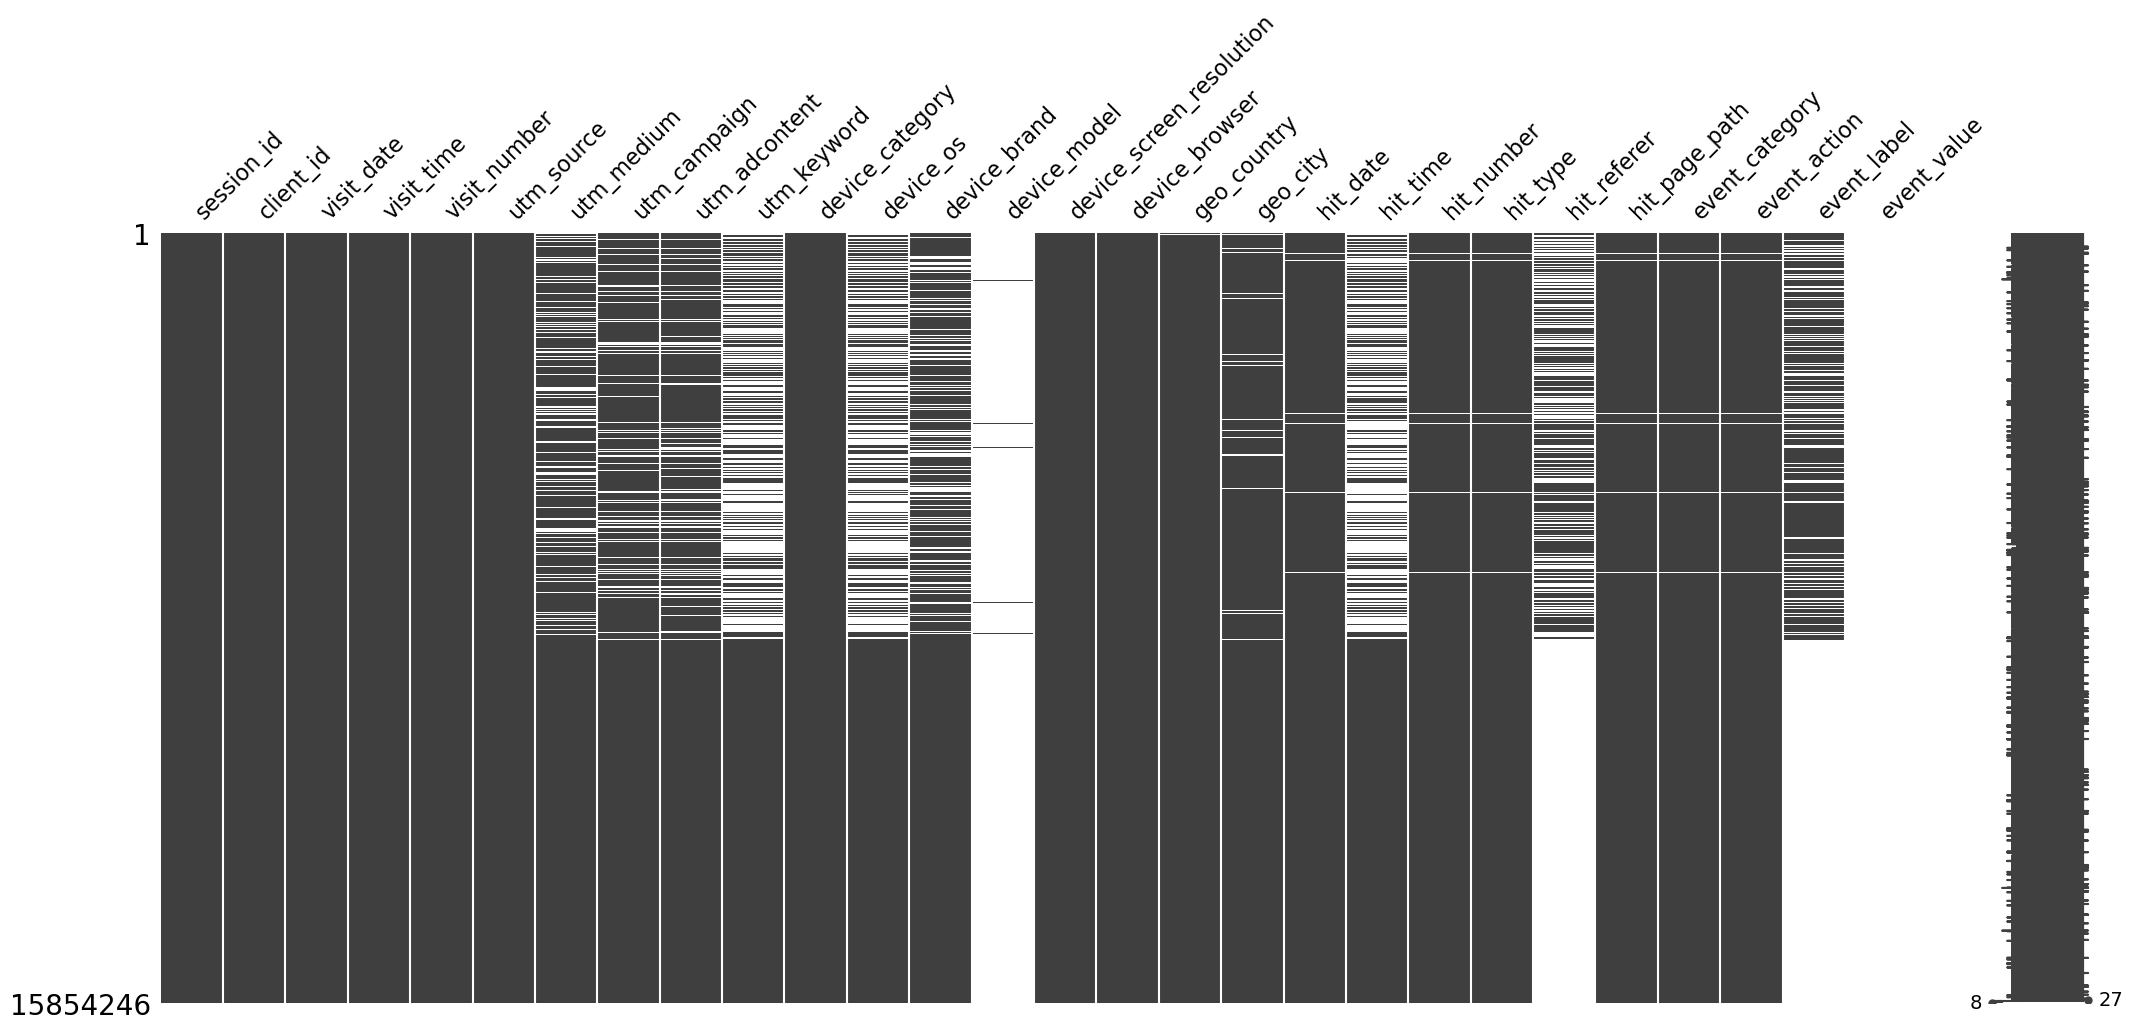

In [16]:
## Визуализация пропущенных значений Датасета
msno.matrix(df_merge);

**Вывод.** В объединённом Датасете:
- в группе колонок 'utm_keyword', 'device_model', 'hit_time', 'hit_referer', 'event_value' пустых значений более 40%. Такое большое количесвто пропущенных значений не даёт возможность удалить строки с пропусками из-за возможности потери при такой операции более половины данных. Так же из-за большого количества пропусков восстановление данных по средним значениям не целесообразно. Таким образом - для исключения ситуации с пропущенными данными целесообразно удалить столбец указанные столбцы;
- в группе колонок 'client_id-utm_source, device_category, device_screen_resolution-device_browser', 'geo_country', 'hit_date', 'hit_number-hit_type, hit_page_path-event_action' имеют пропуски данных в строк - менее 1%. Судя по визуализации пропущенных данных и идентичному количесвту пропусков в отдельных группах колонк - совокупное уменьшение строк в датасете после удаление строк с отсутсвующими значениями в таких колонках приведёт к потре всего около 1,07% записей. Таким образом, учитывая незначительное для наблюдения и моделирования количество потерянных записей при удалении строк с пропущенными данными - для исключения ситуации с пропущенными данными целесообразно удалить строки с пропусками в таких колонках;
- в группе колонок 'utm_medium-utm_adcontent, device_brand, event_label' доля пропущенных значений находится в диапазоне от 14,28% до 26,12%. В этих колонках нет явной зависимости значений от значений в других колонках. Так как данные колонки имеют строковые данные и большой % пропусков, непозволяющий удалить строки с пропущенными данными - целессобразно заменить пропущенные данные наиболее часто встревающимися значениями в соответсвующей колонке;
- в колонке 'geo_city' 4,05% пропущенных данных. При этом значения данной колонки зависят от значений в колонке 'geo_country' (т.е. каждый город может соответсвовать только конкретной стране). Таким образом, пропуски в этой колонке целесообразно заполнить наиболее часто встречающимися значениями, которые выбраны как самые встречающиеся из массивов городов для соответвующих значеням 'geo_country' в строках с не пропущенными значениями 'geo_city'.

In [17]:
# Список удаляемых колонок
# (в колонках более 40% пропущенных данных)
columns_columns_delete = ['utm_keyword', 'device_os', 'device_model',\
                          'hit_time', 'hit_referer', 'event_value']

# Список колонок, в которых проверется наличие пропусков для удаления строк
# (в колонках менее 1% пропущенных данных)
columns_rows_delete = ['client_id', 'visit_date', 'visit_time', 'visit_number',\
                       'utm_source', 'device_category', 'device_screen_resolution',\
                       'device_browser', 'geo_country',\
                       'hit_date', 'hit_number', 'hit_type', 'hit_page_path',\
                       'event_category', 'event_action']

# Список колонок, в которых меняются пропуски на наиболее часто встречающиеся значения
# (в колонках более 1% и менее 40% пропущенных данных)
columns_value_top = ['utm_medium', 'utm_campaign', 'utm_adcontent',\
                     'device_brand', 'event_label']

# Список колонок, в которых меняются пропуски на наиболее часто встречающиеся значения
# при этом одновременно учитываются корреляциии атрибута с другим атрибутом
#(в колонках более 1% и менее 40% пропущенных данных)
columns_value_top_correlation = [('geo_country', 'geo_city')]


In [18]:
# Удаляем и корректируем пропуски в Датасете
df = clean_columns_rows(df_merge,\
                        col_col_df=columns_columns_delete,\
                        col_row_df=columns_rows_delete,\
                        col_cell_val_top=columns_value_top,
                        col_cell_val_top_corr=columns_value_top_correlation)

Размер анализируемого Датасета: (15854246, 28) 

... удаляем колонки, в которых более 40% пропущенных данных ...
После удаления заданных колонок - размер датасета: (15854246, 22) 

... удаляем строки, для которых в колонках менее 1% пропущенных данных ...
После удаления строк с нулевыми значениями - размер датасета: (15673232, 22) 

Удаление колонок и 1 этап удаления строк с нулевыми данными - завершены

... запущена перепроверка отсутствия нулевых данных ... 
Размер анализируемого Датасета: (15673232, 22)
ПРОПУСКИ  В  КОЛОНКАХ  ДАТАСЕТА
  Поле                        Пропуски             Тип данных в колонке 
                           (кол-во,      %)                             
------------------------------------------------------------------------
  utm_medium                3251883    20.75              'str'
  utm_campaign              2197767    14.02              'str'
  utm_adcontent             2830545    18.06              'str'
  device_brand              4073236    25.99 

In [19]:
# Очищаем память от неиспользуемого дальше Датасета (для ускорения вычислений)
del df_merge

**Вывод.** Из первоначального Датасета:
- удалены 6 колонок, в которых пропущено более 40% данных;
- удалён 1,1% записей, в атрибутах которых изначально отсутсвовали значения;
- в 6 колонках заменены пропущенные значения на наиболее часто встречающиеся значения:
 >- в 5 колонках простым поиском значений, наиболее часто встречающихся в данной колонке,
 >- в 1 колонке поиском значений в зависимости от значений другого столбца.